# Data Exploration

This notebook explores the all data processing steps in order from cleaning the raw data to generating the evaluation data template.

We start with two csv files. One contains information about cocoa producers contained in a pdf released by the govenrmnet of Ivory Coast. The other contains information about cocoa producers collected from large cocoa importers (e.g. Ferrero, Olam, Nestle, ...). In order to merge the datasets, we need to find all possible row combinations between the CSVs which describe the same entity. <br>

In [2]:
import pandas as pd

In [2]:
# Read CSV files into DataFrames
cooperatives_1 = pd.read_csv('data/raw/ivorian-cocoa-coop-registry-2017.csv')
cooperatives_2 = pd.read_csv('data/raw/cocoa-suppliers-compiled-from-importers.csv')

## Quick Look at Raw Data

In [3]:
cooperatives_1

,REGIONS,DEPARTEMENTS,DENOMINATIONS / SIGLES,NATURE DE L’ACTIVITE,NOM DU PRESIDENT,CONTACTS
0,NaN,NaN,NaN,NaN,NaN,NaN
1,AGNEBY- TIASSA,AGBOVILLE,SOCIETE COOPERATIVE DES PRODUCTEURS D’ABOUDE-K...,PRODUCTION- COLLECTE- ACHAT- COMMERCIALISATION,SANA NOUFOU,08 00 73 22\n06 96 53 76
2,AGNEBY- TIASSA,AGBOVILLE,SOCIETE COOPERATIVE DES PRODUCTEURS FIDELES D’...,COLLECTE- COMMERCIALISATION,SIAKA SIDIBE,07 47 30 66\n04 93 47 78
3,AGNEBY- TIASSA,AGBOVILLE,SOCIETE COOPERATIVE AGRICOLE EBOYE KOUN D’ AMA...,PRODUCTION- COLLECTE-ACHAT- STOCKAGE-TRANSPORT...,YAO KOFFI BENJAMIN,09 57 28 08
4,AGNEBY- TIASSA,AGBOVILLE,SOCIETE COOPERATIVE DES PRODUCTEURS ASSOCIES D...,PRODUCTION- COLLECTE-ACHAT- STOCKAGE- TRANSPOR...,YAPO KOUAME RENE,05 80 96 76\n07719126\n03 36 30 02\n07 62 18 93
...,...,...,...,...,...,...
3127,WORODOUGOU,SEGUELA,SOCIETE COOPERATIVE ENTRAIDE DE SEGUELA (COOP-...,PRODUCTION-COLLECTE- COMMERCIALISATION,KABRE ALI,49 07 21 18
3128,WORODOUGOU,SEGUELA,SOCIETE COOPERATIVE WIND- PANGA DE SEGUELA (S...,PRODUCTION- COLLECTE-ACHAT- COMMERCIALISATION,TOUGMA IGNACE,08 14 48 43\n45 53 44 55
3129,WORODOUGOU,SEGUELA,SOCIETE COOPERATIVE IVOIRIENNE D’EXPLOITATION ...,PRODUCTION-COLLECTE- COMMERCIALISATION,KOUADIO KONAN MARCEL,08 01 06 03
3130,WORODOUGOU,SEGUELA,SOCIETE COOPERATIVE YEBE DE SEGUELA\n(SOCAYS S...,PRODUCTION-COLLECTE- COMMERCIALISATION,KONE ZANA ALI,48 61 36 24\n46 65 61 92


In [4]:
cooperatives_2

,Tier 1 Suppliers,Producer Name,Abbreviation Name,Region,Source
0,Barry Callebaut AG,Ste coop Anouanzé de N'Denou,S.CA-CA,NaN,MDLZ Cocoa Life Tier 1 and Tier 2 Suppliers - ...
1,Barry Callebaut AG,Ste Coop Agri Allakabo de Gly,CAAG COOP-CA,NaN,MDLZ Cocoa Life Tier 1 and Tier 2 Suppliers - ...
2,Barry Callebaut AG,Ste Coop Agri Akayara de Datta,SCOOPAAD_DATTA,NaN,MDLZ Cocoa Life Tier 1 and Tier 2 Suppliers - ...
3,Barry Callebaut AG,Ste Coop des Producteurs de M'Bokro,COOP CA PM,NaN,MDLZ Cocoa Life Tier 1 and Tier 2 Suppliers - ...
4,Barry Callebaut AG,Ste Coop S EWOUNBO de Tiassalé,EWOUNBO TIASSALE,NaN,MDLZ Cocoa Life Tier 1 and Tier 2 Suppliers - ...
...,...,...,...,...,...
510,Olam International Limited,Société Coopérative Agricole de Watté,SOCOPAWA,Watté,https://www.olamgroup.com/content/dam/olamgrou...
511,Olam International Limited,Société Coopérative des Producteurs pour la Du...,SOCOPDAL SCOOPS,Lakota,https://www.olamgroup.com/content/dam/olamgrou...
512,Olam International Limited,Société Coopérative Agricole Entente de Karié,SOCOPEK,Karie,https://www.olamgroup.com/content/dam/olamgrou...
513,Olam International Limited,Société Coopérative Solidarité de Mahino,SOCOSOM-COOP-CA,Mahino,https://www.olamgroup.com/content/dam/olamgrou...


## Missingness

cooperatives 1: (3132, 6)
cooperatives 2: (515, 5)


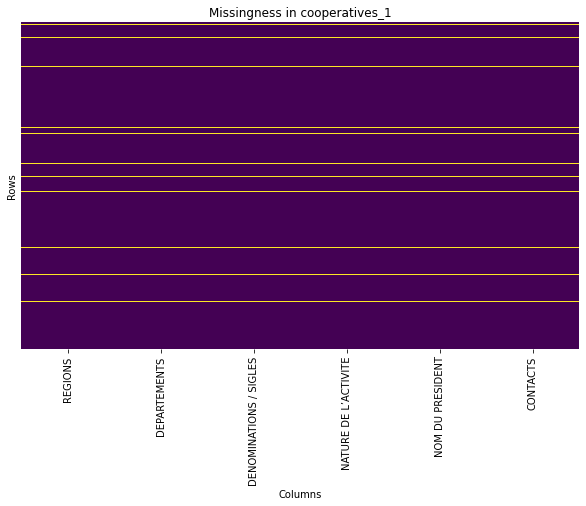

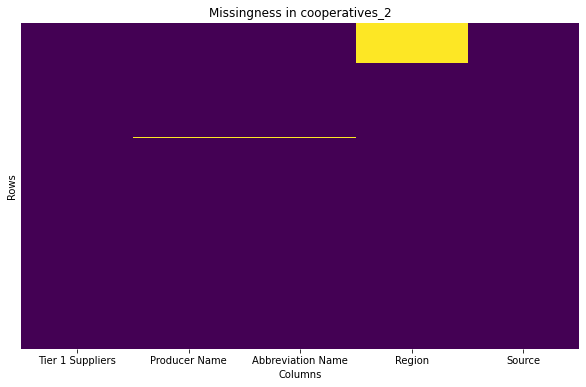


Percentage of missing values in cooperatives_1:
REGIONS                   4.725415
DEPARTEMENTS              4.725415
DENOMINATIONS / SIGLES    4.725415
NATURE DE L’ACTIVITE      4.725415
NOM DU PRESIDENT          4.725415
CONTACTS                  4.725415
dtype: float64

Percentage of missing values in cooperatives_2:
Tier 1 Suppliers      0.000000
Producer Name         0.194175
Abbreviation Name     0.194175
Region               12.427184
Source                0.000000
dtype: float64


In [6]:
from vis import plot_missingness

# Plot missingness for each DataFrame
print(f'cooperatives 1: {cooperatives_1.shape}')
print(f'cooperatives 2: {cooperatives_2.shape}')
plot_missingness(cooperatives_1, 'cooperatives_1')
plot_missingness(cooperatives_2, 'cooperatives_2')

# Calculate and print percentage of missing values for each DataFrame
for name, df in [('cooperatives_1', cooperatives_1), ('cooperatives_2', cooperatives_2)]:
    print(f"\nPercentage of missing values in {name}:")
    print(df.isnull().sum() / len(df) * 100)

## Clean

When cleaning, we first pass over the govrnment data specifically, then use a different function to clean both government and company data, `cooperatives_1` and `cooperatives_2` respectively. 

Government data only: 
1. Remove rows that contain only null values
2. Rename columns to more descriptive names
3. Extract the abbreviation (text inside parentheses) from 'Producer Name' and create a new column for it
4. Remove the abbreviation text along with the parentheses from 'Producer Name'

Process both: 
1. Remove rows where 'Producer Name' or 'Abbreviation Name' are None
2. Clean the 'Producer Name' and 'Abbreviation Name' columns by forcing lower case, removing extra whitespace, normalizing unicode
5. Drop the 'Country' column if it exists

cooperatives 1: (2783, 7)
cooperatives 2: (514, 5)


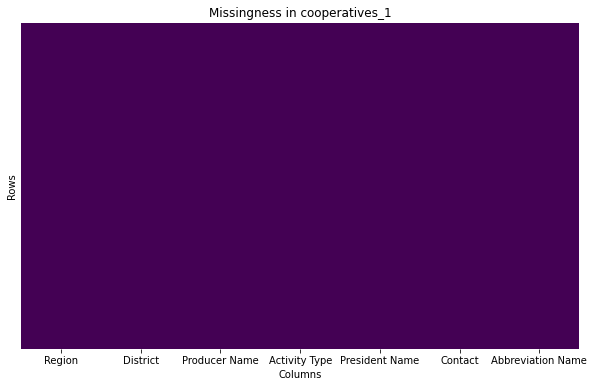

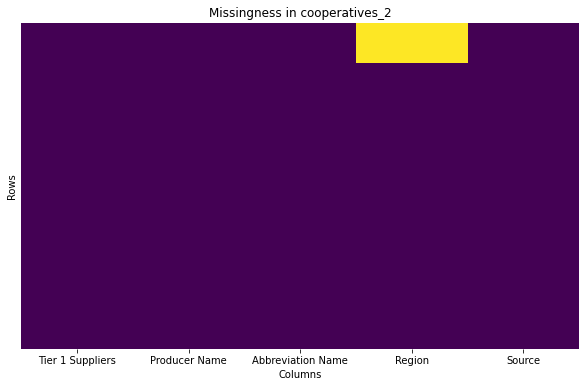


Percentage of missing values in cooperatives_1:
Region               0.0
District             0.0
Producer Name        0.0
Activity Type        0.0
President Name       0.0
Contact              0.0
Abbreviation Name    0.0
dtype: float64

Percentage of missing values in cooperatives_2:
Tier 1 Suppliers      0.000000
Producer Name         0.000000
Abbreviation Name     0.000000
Region               12.451362
Source                0.000000
dtype: float64


In [8]:
cooperatives_1 = pd.read_csv('data/clean/ivorian-cocoa-coop-registry-2017.csv')
cooperatives_2 = pd.read_csv('data/clean/cocoa-suppliers-compiled-from-importers.csv')

# Plot missingness for each DataFrame
print(f'cooperatives 1: {cooperatives_1.shape}')
print(f'cooperatives 2: {cooperatives_2.shape}')
plot_missingness(cooperatives_1, 'cooperatives_1')
plot_missingness(cooperatives_2, 'cooperatives_2')

# Calculate and print percentage of missing values for each DataFrame
for name, df in [('cooperatives_1', cooperatives_1), ('cooperatives_2', cooperatives_2)]:
    print(f"\nPercentage of missing values in {name}:")
    print(df.isnull().sum() / len(df) * 100)

As you can see, there are some null values left in `Region`, but it will not matter because it is not used in evaluation. 

## Generate Name Pairs

Name pairs are generated by taking the cartesian product between the two cleaned CSVs.

In [9]:
pairs = pd.read_csv('data/outputs/all_pairs.csv')
pairs

,Producer Name_x,Abbreviation Name_x,Region_x,Producer Name_y,Abbreviation Name_y,Region_y
0,societe cooperative des producteurs daboude-ko...,scpaak coop-ca,AGNEBY- TIASSA,ste coop anouanze de n'denou,s.ca-ca,NaN
1,societe cooperative des producteurs daboude-ko...,scpaak coop-ca,AGNEBY- TIASSA,ste coop agri allakabo de gly,caag coop-ca,NaN
2,societe cooperative des producteurs daboude-ko...,scpaak coop-ca,AGNEBY- TIASSA,ste coop agri akayara de datta,scoopaad_datta,NaN
3,societe cooperative des producteurs daboude-ko...,scpaak coop-ca,AGNEBY- TIASSA,ste coop des producteurs de m'bokro,coop ca pm,NaN
4,societe cooperative des producteurs daboude-ko...,scpaak coop-ca,AGNEBY- TIASSA,ste coop s ewounbo de tiassale,ewounbo tiassale,NaN
...,...,...,...,...,...,...
1430457,societe cooperative worodougouka,scws coop-ca,WORODOUGOU,societe cooperative agricole de watte,socopawa,Watté
1430458,societe cooperative worodougouka,scws coop-ca,WORODOUGOU,societe cooperative des producteurs pour la du...,socopdal scoops,Lakota
1430459,societe cooperative worodougouka,scws coop-ca,WORODOUGOU,societe cooperative agricole entente de karie,socopek,Karie
1430460,societe cooperative worodougouka,scws coop-ca,WORODOUGOU,societe cooperative solidarite de mahino,socosom-coop-ca,Mahino


## Vector Silarity Tests

We use `paraphrase-MiniLM-L6-v2` from huggingface and TF-IDF vectorizer to embed the producer names and find each pair's cosine similarity. A high similarity should indicate a higher likelihood that the names represent the same entity. We define thresholds for each method and use the results to generate an eval set. These samples with high similarity will be more difficult to classify on average, and, thus, provide a good starting point for the eval set. 

In [3]:
processed_pairs = pd.read_csv('data/outputs/pair_similarity.csv')
processed_pairs.describe()

,tf_idf_similarity_name,semantic_similarity_name,second_half_similarity_name,second_half_weighted_similarity
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.047012,0.619417,0.352008,0.485713
std,0.052823,0.137601,0.144011,0.122493
min,0.000000,-0.047488,-0.207100,-0.049703
25%,0.021311,0.541096,0.255312,0.408155
50%,0.035211,0.636809,0.340108,0.486357
75%,0.056195,0.716260,0.434237,0.563073
max,1.000000,1.000000,1.000000,1.000000


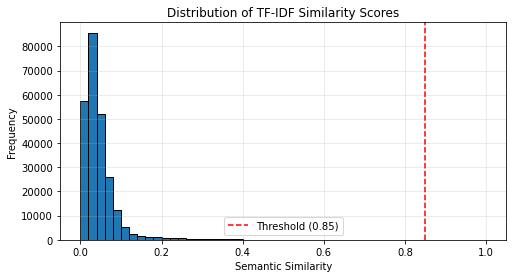

Percentage of pairs with similarity > 0.85: 0.02%


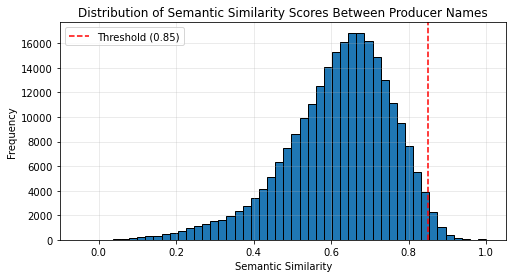

Percentage of pairs with similarity > 0.85: 1.76%


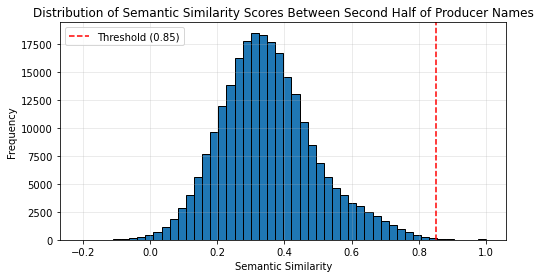

Percentage of pairs with similarity > 0.85: 0.13%


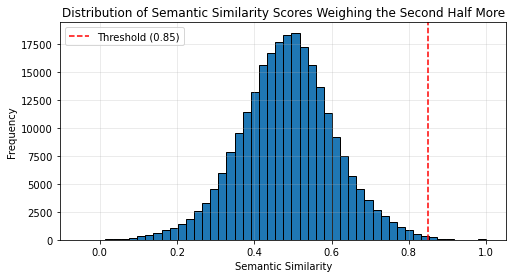

Percentage of pairs with similarity > 0.85: 0.19%


In [14]:
from vis import similarity_hist

similarity_hist(
    df=processed_pairs, 
    column='tf_idf_similarity_name', 
    title='Distribution of TF-IDF Similarity Scores', 
    threshold= 0.85
)

similarity_hist(
    df=processed_pairs, 
    column='semantic_similarity_name', 
    title='Distribution of Semantic Similarity Scores Between Producer Names', 
    threshold= 0.85
)

similarity_hist(
    df=processed_pairs, 
    column='second_half_similarity_name', 
    title='Distribution of Semantic Similarity Scores Between Second Half of Producer Names', 
    threshold= 0.85
)

similarity_hist(
    df=processed_pairs, 
    column='second_half_weighted_similarity', 
    title='Distribution of Semantic Similarity Scores Weighing the Second Half More', 
    threshold= 0.85
)

### Explore Pairs Ranked

Change `column` to the column from `processed_pairs` that you want to sort by to explore.

Your choices:
1. `tf_idf_similarity_name`
2. `semantic_similarity_name`
3. `second_half_similarity_name`
4. `second_half_weighted_similarity`

In [20]:
column = 'semantic_similarity_name'
processed_pairs = processed_pairs.sort_values(by=column, ascending=False)
        
for i in range(100):
    row = processed_pairs.iloc[i]
    print(f"{row['Producer Name_x']:<50} | {row['Producer Name_y']:<50} | {row[column]:.4f} | {row['Abbreviation Name_x']:<10} | {row['Abbreviation Name_y']:<10} ")
    

cooperative agricole siboulaka de beoua            | cooperative agricole siboulaka de beoua            | 1.0000 | c.asi.b scoops | casib-scoops 
nouvelle entreprise cooperative agricole de bagolieoua | nouvelle entreprise cooperative agricole de bagolieoua | 1.0000 | coop-ca necab | coop-ca necab 
societe cooperative agricole de guitry             | societe cooperative agricole de guitry             | 1.0000 | coop-ca socoopgui | coop-ca-socoagui 
societe cooperative agricole de soubre             | societe cooperative agricole de soubre             | 1.0000 | socopaso scoops | scasou-coop-ca 
societe cooperative agricole sinikan               | societe cooperative agricole sinikan               | 1.0000 | coopas     | sinikan-scoopas 
societe cooperative agricole de guitry             | societe cooperative agricole de guitry             | 1.0000 | coop-ca socoagui | coop-ca-socoagui 
societe cooperative des agriculteurs de soubre     | societe cooperative des agriculteurs de soubre  

One thing we can notice immediately from `semantic_similarity_name` is that the way the string starts seems to heavily sway the similarity resulting similarity measure. This is why we create `second_half_similarity_name` and combine the aforementioned two to create `second_half_weighted_similarity`.

## Evaluation Template

We generate the evaluation data template by pulling the top 200 pairs ranked by `second_half_weighted_similarity` and `tf_idf_similarity_name`. The duplicate rows are removed and new column `classification` is added with all calsses set to 0 (false).

In [16]:
eval_template = pd.read_csv('data/outputs/eval_template.csv')
eval_template

,Producer Name_x,Producer Name_y,Abbreviation Name_x,Abbreviation Name_y,classification
0,societe cooperative agricole de guitry,societe cooperative agricole de guitry,coop-ca socoagui,coop-ca-socoagui,0
1,societe cooperative agricole de guitry,societe cooperative agricole de guitry,coop-ca socoopgui,coop-ca-socoagui,0
2,societe cooperative agricole de guitry,societe cooperative agricole de guitry,socoopag coop-ca,coop-ca-socoagui,0
3,cooperative agricole siboulaka de beoua,cooperative agricole siboulaka de beoua,c.asi.b scoops,casib-scoops,0
4,societe cooperative agricole de bayota,societe cooperative agricole de bayota,socaba coop-ca,socaba,0
...,...,...,...,...,...
300,societe cooperative de meagui,societe cooperative agricole bekanti de meagui,scoops socom,cabm,0
301,societe cooperative agricole de youkou,societe cooperative agricole espoir de petit-g...,socayou,scaepgy,0
302,societe cooperative des exploitants agricoles ...,societe cooperative agricole de soubre,ceaso scoops,scasou-coop-ca,0
303,cooperative agricole la renaissance de gadouan,cooperative agricole la renaissance de vavoua,carega,careva,0
